(240, 320, 3)
[[[232 241 212]
  [237 245 232]
  [230 242 230]
  ...
  [165  68  85]
  [125  50  91]
  [121  54  95]]

 [[240 248 224]
  [244 252 241]
  [236 248 238]
  ...
  [123  29  45]
  [126  50  76]
  [133  57 103]]

 [[240 247 229]
  [244 252 241]
  [238 248 237]
  ...
  [120  32  48]
  [134  58  70]
  [135  53  99]]

 ...

 [[ 77  75  36]
  [ 70  65  33]
  [ 76  70  48]
  ...
  [136 113 121]
  [135 114 121]
  [134 115 121]]

 [[ 73  68  38]
  [ 71  65  41]
  [ 82  74  55]
  ...
  [140 119 128]
  [138 118 129]
  [135 118 128]]

 [[ 76  68  47]
  [ 76  67  50]
  [ 87  75  59]
  ...
  [141 121 132]
  [137 119 131]
  [135 119 130]]]


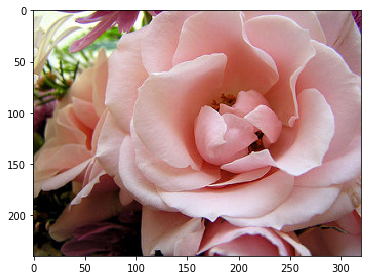

In [1]:
train_root = "Training"
test_root = "Test"

from skimage import io
image = io.imread("Training/rose/12240303_80d87f77a3_n.jpg")

print(image.shape)
print(image)
io.imshow(image)

batch_size = 2

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (100, 100), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (100, 100), batch_size=batch_size)


Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


In [3]:
# #optional
# print(train_data[0][0][0].shape)
# # total 4317 data below to 5 clasess
# print(len(train_data)) #4317/batch size
# print(len(train_data[0])) #2, 1st image, 2nd is label
# #print(train_data[0])
# print(len(train_data[0][0])) #1st batch of 10 data
# print(len(train_data[0][0][0])) #the image, the vertical
# print(len(train_data[0][0][0][0])) #the image, the horizontal
# print(len(train_data[0][0][0][0][0])) #the image, RGB


5


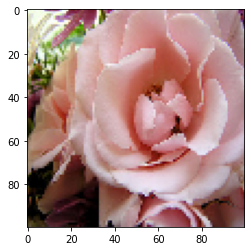

In [4]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)


In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)        0

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=10)


Epoch 1/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.6732 - accuracy: 0.2826
Epoch 2/10
2159/2159 [==============================] - 42s 20ms/step - loss: 1.4644 - accuracy: 0.3692
Epoch 3/10
2159/2159 [==============================] - 40s 19ms/step - loss: 1.2666 - accuracy: 0.4781
Epoch 4/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.2394 - accuracy: 0.4897
Epoch 5/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.3317 - accuracy: 0.4172
Epoch 6/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.3152 - accuracy: 0.4269
Epoch 7/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.3033 - accuracy: 0.4336
Epoch 8/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.2996 - accuracy: 0.4461
Epoch 9/10
2159/2159 [==============================] - 41s 19ms/step - loss: 1.2911 - accuracy: 0.4603
Epoch 10/10
2159/2159 [==============================] - 41s 19m

In [7]:
# # Using Resnet
# from tensorflow.keras.applications.resnet50 import ResNet50
# from keras.models import Model
# import keras
# restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3))
# restnet.summary()

# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
# from keras.models import Sequential
# from keras import optimizers
# model = Sequential()
# model.add(restnet)
# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# model.fit(train_data, batch_size = 20, epochs=2)

# score = model.evaluate(test_data)
# print(score)


In [8]:
score = model.evaluate(train_data)
print(score)

2159/2159 [==============================] - 15s 7ms/step - loss: 1.4202 - accuracy: 0.4749
[1.4202319383621216, 0.4748668074607849]


In [9]:
score = model.evaluate(test_data)
print(score)

2159/2159 [==============================] - 13s 6ms/step - loss: 1.4202 - accuracy: 0.4749
[1.420231819152832, 0.4748668074607849]


In [10]:
from keras.models import save_model
save_model(model, "Flower")
#model.save("Flower/assets", save_format="h5")

INFO:tensorflow:Assets written to: Flower\assets
